## Team Zero Budget

#### Part -1

Aanal Patel	C0910376

Jayachandhran Saravanan	C0910392

Danilo Diaz	C0889539

Ernie Sumoso	C0881591

Yogita Sharma c0913011



<a id="0"></a> 
## After the data extraction is done, then please find out the following:
1a.	[data collection](#1)

1b.	[Data_Cleansing](#2)

1c.	[word_cloud/Bar diagram](#3)

2.	[LDA ](#4)
  
4.	[word_cloud](#5)

  
6.	[display ](#6)

Other:
ex_1:
ex_2:


<a id="1"></a> 
## 1.data collection

In [12]:
#as usually importing required packages
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
#for passing credentials
import os
from dotenv import load_dotenv

In [13]:

# Load environment variables from .env file for passcodes
load_dotenv()

#details of the page 
login_url = 'https://moodle.cestarcollege.com/moodle/login/index.php'
username = os.getenv('MOODLE_USERNAME')
password = os.getenv('MOODLE_PASSWORD')



print(f"Username_loaded_as: {username}")
print(f"Password_loaded: {'*' * len(password)}")

Username_loaded_as: 910392
Password_loaded: ************


In [14]:
## Using Beautiful soup for scrapping our college moodle news

In [15]:
session = requests.Session() #this is was interesting as it create a small cookie session for loading all the data


## after many tries the login url and the tokens are mismatching so we got it from the main URL
l_url = session.get(login_url)
print(l_url)

#using bs4 for getting the reuqired config details
content_lp = BeautifulSoup(l_url.content, 'html.parser')
login_token = content_lp.find('input', {'name': 'logintoken'})['value'] #getting only the login tokens
# print(content_lp)
login_data = {
    'username': username,
    'password': password,
    'logintoken': login_token
}

response = session.post(login_url, data=login_data)


<Response [200]>


In [16]:

##getting the older topics page for extracting the table 
if "Log in to the site" not in response.text:
    print("Login successful")

    #hard coded URL for the page present in the moodle
    base_url = 'https://moodle.cestarcollege.com/moodle/mod/forum/view.php?id=647'
    #empty list 
    temp = []
    
    # Iterate through all 38 pages 
    ## https://moodle.cestarcollege.com/moodle/mod/forum/view.php?id=647&o=1&p=1 this is the main repo URL
    
    for page in range(1, 38):
        url = f"{base_url}&o=1&p={page}"
        resp = session.get(url) #checking for each page to get the details
        if resp.status_code == 200:
            print(f"Page no: {page}")
            soup = BeautifulSoup(resp.content, 'html.parser')
            page_title = soup.title.string if soup.title else "No title found"
            print(f"title: {page_title}")
            topics = soup.find_all('tr', class_='discussion')
            if not topics:
                print("No topics, checking the post tag in the html div")
                topics = soup.find_all('div', class_='forumpost')
                if topics:
                    print(f"Found {len(topics)} forum posts")
                else:
                    print("Nothing")
                print(soup.prettify()[:500]) #error message if present
            #now getting the data and creating a df
            for topic in topics:
                #we are getting topic link, topic heading and author and last post is someting we don;t what it is
                topic_link = topic.find('th', class_='topic')
                if topic_link:
                    topic_link = topic_link.find('a')
                if topic_link:
                    topic_title = topic_link.text.strip()
                    topic_url = topic_link['href']
                    author = topic.find('td', class_='author')
                    author = author.text.strip() if author else "Unknown"
                    last_post = topic.find('td', class_='lastpost')
                    last_post = last_post.text.strip() if last_post else "Unknown"
                    #adding it to the list
                    temp.append({
                        'Title': topic_title,
                        'URL': topic_url,
                        'Author': author,
                        'Last Post': last_post
                    })
                    
                    print(f"Done_dusted: {topic_title}")
                else:
                    print("erroe")
            
            print(f"Page :{page} , scraped: {len(temp)}")
            time.sleep(5)
        else:
            print(f"Error in page {page}, {resp.status_code}")
else:
    print("Login failed. Please check your credentials.")

Login successful
Page no: 1
title: Site News | Lambton College in Toronto Learning Management System
Done_dusted: Parking Information
Done_dusted: Join the LCIT PM Guild Club | CCR Approved
Done_dusted: Volunteers for LCIT Business Caucus Club
Done_dusted: Volunteers for ASQ Student Chapter & SCMT Guild
Done_dusted: Queries regarding Group change
Done_dusted: Tutoring Services Closed
Done_dusted: Summer 2024 Group selection schedule for returning students
Done_dusted: Summer 2024 Makeup course Registration dates
Done_dusted: 2024 Summer Payment deadline for returning students
Done_dusted: Multi-Faith Prayer Room
Done_dusted: Summer 2024 Group selection schedule for returning students
Done_dusted: Safety announcement - April 8
Done_dusted: Summer 2024 Makeup course Registration dates
Done_dusted: Attention All Winter 2024 Potential Grad eligible students
Done_dusted: PGWP Information Online Session- March 25th, 2024
Done_dusted: DesiDeli Service
Done_dusted: 2024 Summer Payment deadline

In [17]:

df = pd.DataFrame(temp)

if not df.empty:
    df.to_csv('moodle_topics.csv', index=False)
    print(f"Scraping completed. Total topics scraped: {len(temp)}")
    print("Data saved to 'moodle_topics.csv'")
else:
    print("No data ")


Scraping completed. Total topics scraped: 3537
Data saved to 'moodle_topics.csv'


In [18]:
df.head()

,Title,URL,Author,Last Post
0,Parking Information,https://moodle.cestarcollege.com/moodle/mod/fo...,Ash Rai\n\n\r\n 7 May 2024,Unknown
1,Join the LCIT PM Guild Club | CCR Approved,https://moodle.cestarcollege.com/moodle/mod/fo...,Tutoring Centre @Lambton College In Toronto\n\...,Unknown
2,Volunteers for LCIT Business Caucus Club,https://moodle.cestarcollege.com/moodle/mod/fo...,Tutoring Centre @Lambton College In Toronto\n\...,Unknown
3,Volunteers for ASQ Student Chapter & SCMT Guild,https://moodle.cestarcollege.com/moodle/mod/fo...,Tutoring Centre @Lambton College In Toronto\n\...,Unknown
4,Queries regarding Group change,https://moodle.cestarcollege.com/moodle/mod/fo...,Student Services @Lambton College In Toronto\n...,Unknown


In [19]:
df.describe()

,Title,URL,Author,Last Post
count,3537,3537,3537,3537
unique,3162,3537,2490,1
top,Weekly Advising Blog,https://moodle.cestarcollege.com/moodle/mod/fo...,Student Services @Lambton College In Toronto\n...,Unknown
freq,20,1,11,3537


In [20]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import gensim
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Load the scraped data
df = pd.read_csv('moodle_topics.csv')

# 1. Tokenization
def tokenize(text):
    return word_tokenize(text.lower())

# 2. Remove words less than 3 characters
def remove_short_words(tokens):
    return [token for token in tokens if len(token) >= 3]

# 3. Remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

# 4. Lemmatization and stemming
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
def lemmatize_and_stem(tokens):
    return [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens]

# Preprocess the text
def preprocess(text):
    tokens = tokenize(text)
    tokens = remove_short_words(tokens)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_and_stem(tokens)
    return tokens

# Apply preprocessing to the Title column
df['processed_title'] = df['Title'].apply(preprocess)



In [21]:
# 5. Create dictionary and filter
dictionary = corpora.Dictionary(df['processed_title'])
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=1000)

# 6. Create Bag of Words corpus
corpus = [dictionary.doc2bow(text) for text in df['processed_title']]

# 7. Apply LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100,
                     update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)



In [22]:
# !conda install -c conda-forge gensim nltk wordcloud matplotlib pyldavis -y

In [23]:
import scipy
import gensim
print(scipy.__version__)
print(gensim.__version__)

1.13.1
4.3.3


In [24]:
import nltk

In [25]:
import sys
print(sys.executable)

/opt/anaconda3/envs/YT-env/bin/python


In [26]:
df.head()

,Title,URL,Author,Last Post,processed_title
0,Parking Information,https://moodle.cestarcollege.com/moodle/mod/fo...,Ash Rai\n\n\r\n 7 May 2024,Unknown,"[park, inform]"
1,Join the LCIT PM Guild Club | CCR Approved,https://moodle.cestarcollege.com/moodle/mod/fo...,Tutoring Centre @Lambton College In Toronto\n\...,Unknown,"[join, lcit, guild, club, ccr, approv]"
2,Volunteers for LCIT Business Caucus Club,https://moodle.cestarcollege.com/moodle/mod/fo...,Tutoring Centre @Lambton College In Toronto\n\...,Unknown,"[volunt, lcit, busi, caucu, club]"
3,Volunteers for ASQ Student Chapter & SCMT Guild,https://moodle.cestarcollege.com/moodle/mod/fo...,Tutoring Centre @Lambton College In Toronto\n\...,Unknown,"[volunt, asq, student, chapter, scmt, guild]"
4,Queries regarding Group change,https://moodle.cestarcollege.com/moodle/mod/fo...,Student Services @Lambton College In Toronto\n...,Unknown,"[queri, regard, group, chang]"


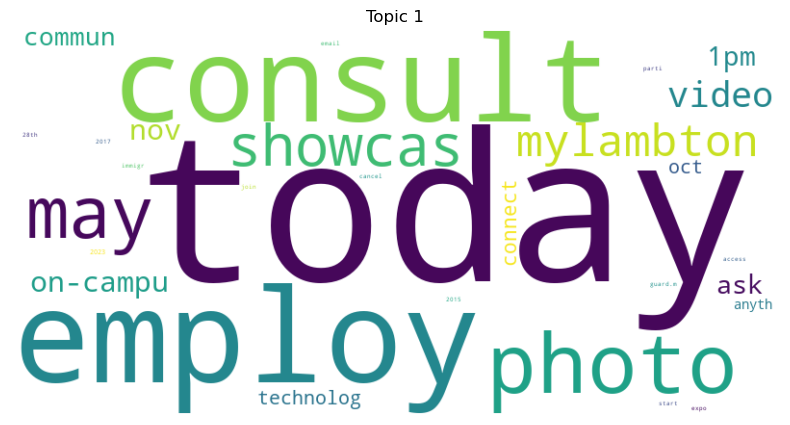

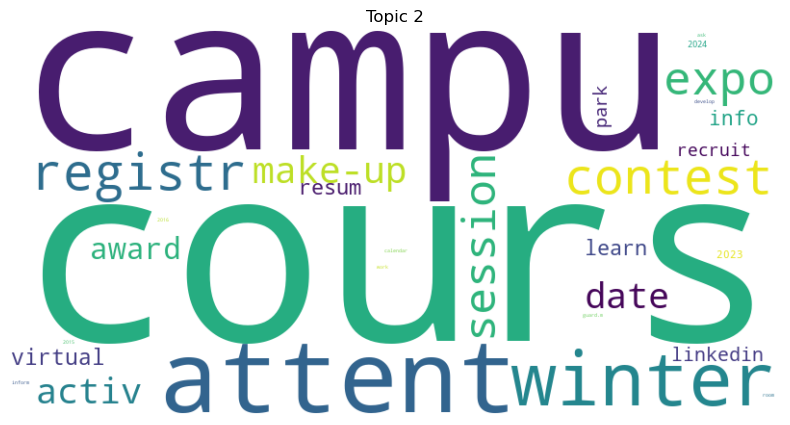

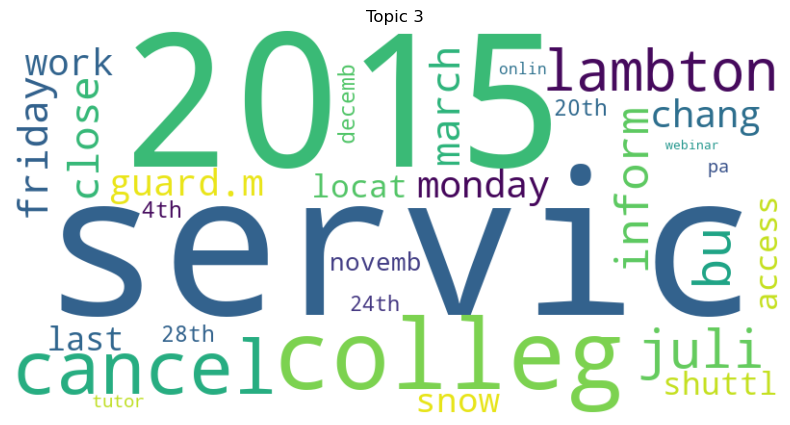

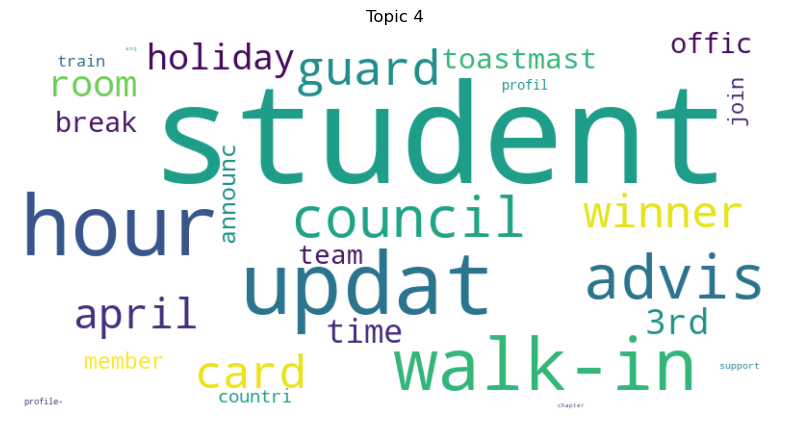

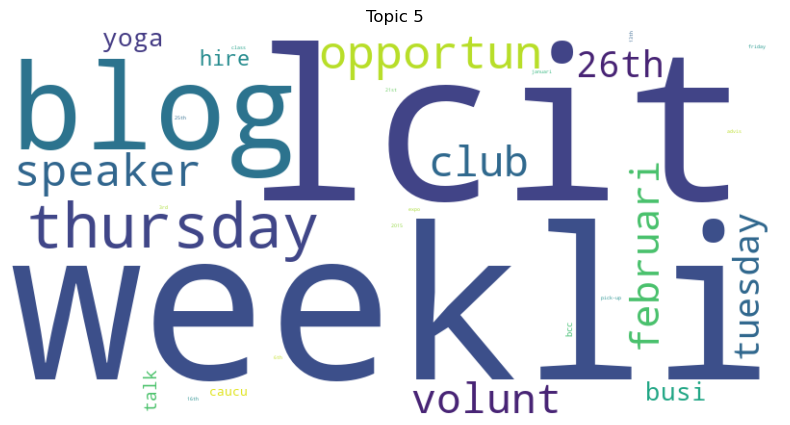

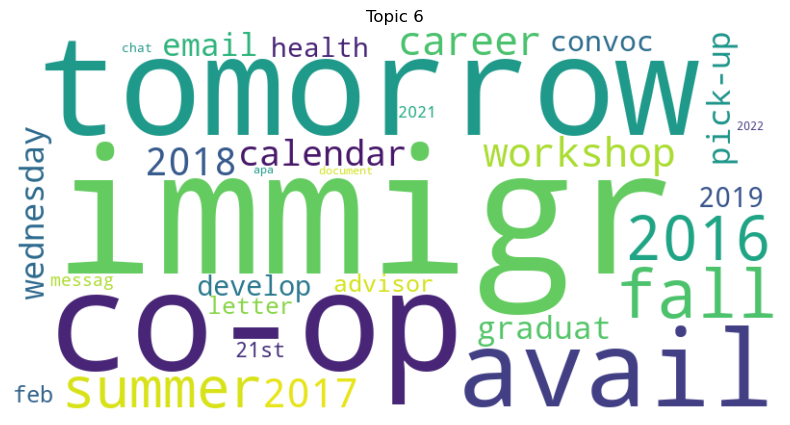

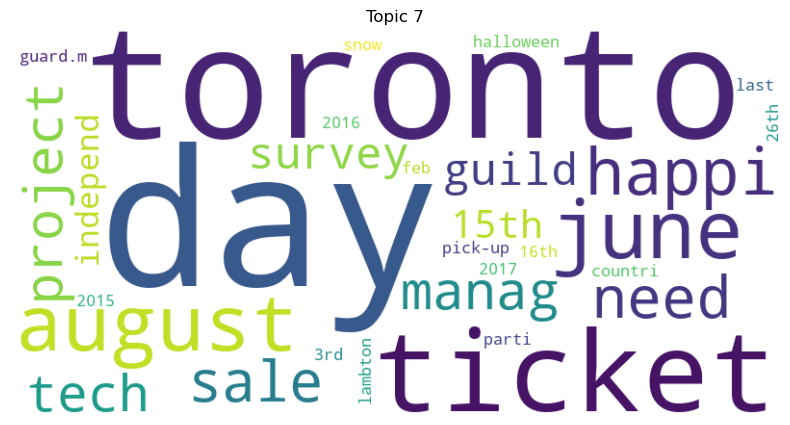

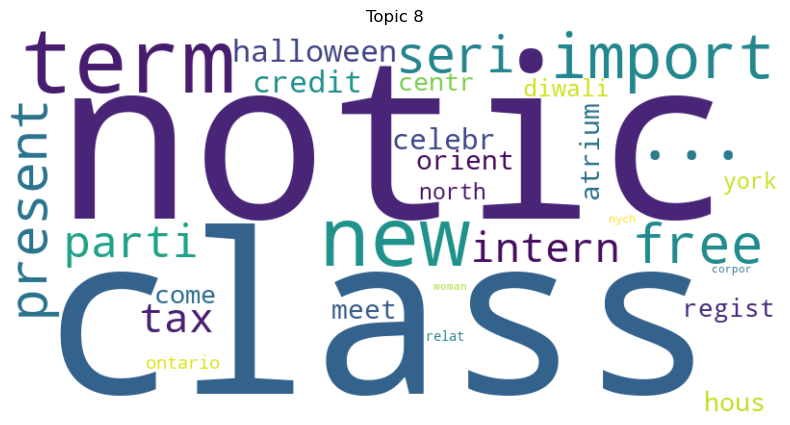

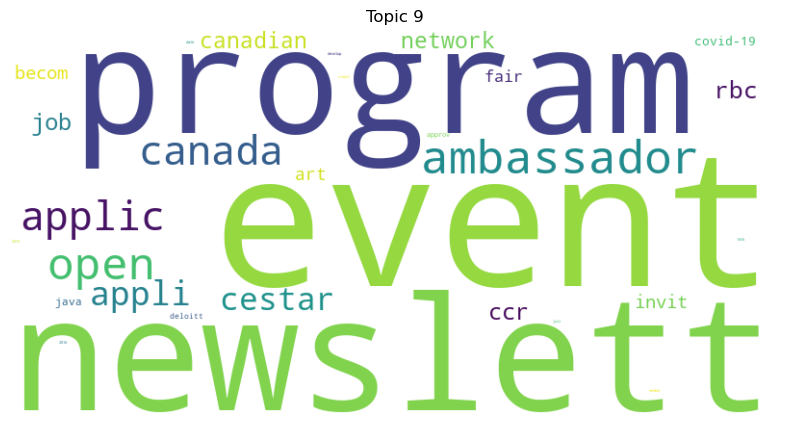

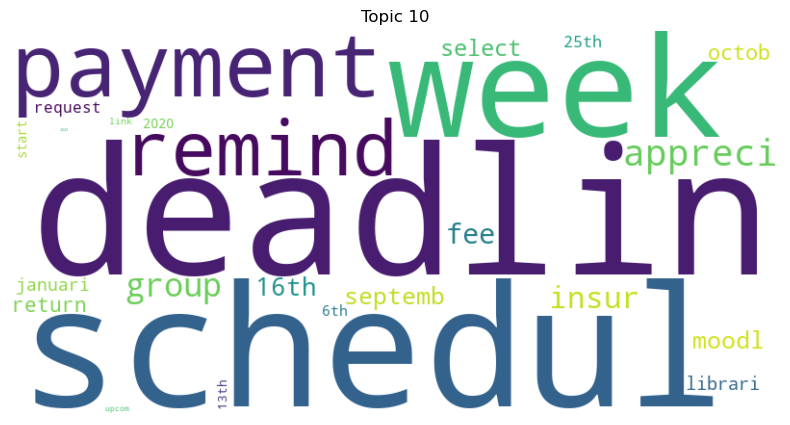

/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=31533) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=31533) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=31533) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=31533) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/jobl

Interactive visualization saved as 'lda_visualization.html'

Top words for each topic:
Topic 1: 0.291*"today" + 0.158*"employ" + 0.140*"consult" + 0.087*"photo" + 0.063*"may" + 0.063*"showcas" + 0.043*"mylambton" + 0.027*"video" + 0.017*"nov" + 0.016*"on-campu"
Topic 2: 0.122*"cours" + 0.117*"campu" + 0.108*"attent" + 0.096*"winter" + 0.088*"registr" + 0.080*"contest" + 0.071*"expo" + 0.067*"session" + 0.042*"make-up" + 0.041*"activ"
Topic 3: 0.098*"servic" + 0.086*"2015" + 0.078*"colleg" + 0.072*"cancel" + 0.072*"lambton" + 0.062*"juli" + 0.058*"bu" + 0.047*"inform" + 0.037*"close" + 0.035*"friday"
Topic 4: 0.406*"student" + 0.098*"updat" + 0.094*"hour" + 0.068*"walk-in" + 0.046*"advis" + 0.039*"council" + 0.029*"guard" + 0.027*"card" + 0.026*"winner" + 0.023*"april"
Topic 5: 0.125*"weekli" + 0.124*"lcit" + 0.119*"blog" + 0.086*"thursday" + 0.082*"opportun" + 0.073*"speaker" + 0.066*"club" + 0.064*"volunt" + 0.058*"februari" + 0.049*"26th"
Topic 6: 0.131*"immigr" + 0.079*"co-op" + 0.0

In [27]:
# 8. Create word clouds for top 10 topics
def create_wordcloud(model, topic_number, title):
    topic_words = dict(model.show_topic(topic_number, 30))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

for i in range(10):
    create_wordcloud(lda_model, i, f'Topic {i+1}')

# Create interactive visualization
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_visualization.html')
print("Interactive visualization saved as 'lda_visualization.html'")

# Print the top words for each topic
print("\nTop words for each topic:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")



In [28]:
def get_dominant_topic(ldamodel, corpus, texts):
    dominant_topics = []
    for i, doc_topics in enumerate(ldamodel[corpus]):
        # Check if doc_topics is a list of tuples or a single tuple
        if isinstance(doc_topics, list):
            # If it's a list of tuples, sort it
            sorted_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
            dominant_topic = sorted_topics[0][0] if sorted_topics else None
        elif isinstance(doc_topics, tuple):
            # If it's a single tuple, just use the topic number
            dominant_topic = doc_topics[0]
        else:
            # If it's neither, set to None or handle as appropriate
            dominant_topic = None
        
        dominant_topics.append((i, dominant_topic))
    return dominant_topics

# Get dominant topics
dominant_topics = get_dominant_topic(lda_model, corpus, df['processed_title'])

# Add dominant topic to the dataframe
df['dominant_topic'] = [item[1] for item in dominant_topics]

In [29]:
print("Sample of LDA model output:")
for i, doc_topics in enumerate(lda_model[corpus][:5]):  # Print first 5 documents
    print(f"Document {i}: {doc_topics}")
    if i >= 4:  # Stop after 5 documents
        break

Sample of LDA model output:
Document 0: ([(0, 0.045911033), (1, 0.22186573), (2, 0.2405609), (3, 0.11321995), (4, 0.043910265), (5, 0.09506455), (6, 0.046438683), (7, 0.07125356), (8, 0.05042989), (9, 0.071345456)], [(0, [2]), (1, [1])], [(0, [(2, 0.9999849)]), (1, [(1, 0.99990255)])])
Document 1: ([(0, 0.02814875), (1, 0.039291646), (2, 0.050745763), (3, 0.1661451), (4, 0.220425), (5, 0.058285758), (6, 0.12521344), (7, 0.043686755), (8, 0.22431475), (9, 0.043743055)], [(2, [8]), (3, [8]), (4, [4]), (5, [6]), (6, [3]), (7, [4])], [(2, [(8, 0.99900615)]), (3, [(8, 0.99996)]), (4, [(4, 0.9999886)]), (5, [(6, 0.9999105)]), (6, [(3, 0.99979407)]), (7, [(4, 0.999994)])])
Document 2: ([(0, 0.031160168), (1, 0.04349503), (2, 0.05617454), (3, 0.076843224), (4, 0.5652775), (5, 0.06452102), (6, 0.031518288), (7, 0.048360325), (8, 0.034227148), (9, 0.0484227)], [(4, [4]), (7, [4]), (8, [4]), (9, [4]), (10, [4])], [(4, [(4, 0.9999966)]), (7, [(4, 0.9999982)]), (8, [(4, 0.99998575)]), (9, [(4, 0.99

In [30]:
df.head()

,Title,URL,Author,Last Post,processed_title,dominant_topic
0,Parking Information,https://moodle.cestarcollege.com/moodle/mod/fo...,Ash Rai\n\n\r\n 7 May 2024,Unknown,"[park, inform]","[(0, 0.045911033), (1, 0.22186573), (2, 0.2405..."
1,Join the LCIT PM Guild Club | CCR Approved,https://moodle.cestarcollege.com/moodle/mod/fo...,Tutoring Centre @Lambton College In Toronto\n\...,Unknown,"[join, lcit, guild, club, ccr, approv]","[(0, 0.02814875), (1, 0.039291646), (2, 0.0507..."
2,Volunteers for LCIT Business Caucus Club,https://moodle.cestarcollege.com/moodle/mod/fo...,Tutoring Centre @Lambton College In Toronto\n\...,Unknown,"[volunt, lcit, busi, caucu, club]","[(0, 0.031160168), (1, 0.04349503), (2, 0.0561..."
3,Volunteers for ASQ Student Chapter & SCMT Guild,https://moodle.cestarcollege.com/moodle/mod/fo...,Tutoring Centre @Lambton College In Toronto\n\...,Unknown,"[volunt, asq, student, chapter, scmt, guild]","[(0, 0.031172026), (1, 0.043512076), (2, 0.056..."
4,Queries regarding Group change,https://moodle.cestarcollege.com/moodle/mod/fo...,Student Services @Lambton College In Toronto\n...,Unknown,"[queri, regard, group, chang]","[(0, 0.045910507), (1, 0.06408432), (2, 0.2405..."


In [31]:
# !conda install -c conda-forge pyldavis

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(lda_model, topic_id):
    topic_words = dict(lda_model.show_topic(topic_id, 30))
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id + 1}')
    plt.savefig(f'topic_{topic_id + 1}_wordcloud.png')
    plt.close()

# Generate word clouds for each topic
for i in range(lda_model.num_topics):
    create_wordcloud(lda_model, i)